# Visualization of network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, multinomial, bernoulli
import time

import random
from numpy.random import seed
%matplotlib inline

from simulation_utils import *
from network_utils import *

In [137]:
def visual_barbell(adj, n1, n2):
    # get the row, col indices of the non-zero elements in the adjacency matrix
    conn_indices = np.where(adj)

    # get the edge weights corresponding to these indices
    weights = adj[conn_indices]

    # a sequence of (i, j) tuples, each corresponding to an edge from i -> j
    edges = list(zip(*conn_indices))
    is_bridge = [0] * len(edges)
    for i, e in enumerate(edges):
        if min(e) < n1 and max(e) >= n1:
            is_bridge[i] = 1

    # initialize the graph from the edge sequence
    G = igraph.Graph(edges=edges, directed=False)

    # assign node names and weights to be attributes of the vertices and edges respectively
    label = np.array([0] * adj.shape[0])
#     G.vs['label'] = label
    
    col_list = ['#87CEEB', 'grey','red','green','blue']
    G.vs['color'] = [col_list[i] for i in label]
    G.es['weight'] = weights
    # '#708090': slate grey, #F08080: light coral
    edge_color_list = ['#708090', '#F08080']
    G.es['color'] = [edge_color_list[x] for x in is_bridge]
    # Assign the weights to the 'width' attribute of the edges. This
    # means that igraph.plot will set the line thicknesses according to the edge
    # weights
    G.es['width'] = weights

    # plot the graph
    visual_style = {}
    
    visual_style["vertex_size"] = 10
    
    visual_style["edge_curved"] = 0
    
    
#     visual_style["layout"] = G.layout_kamada_kawai()
    visual_style["bbox"] = (300, 300)
#     visual_style["margin"] = 10
#     visual_style["layout"] = G.layout_sphere()
#     visual_style["layout"] = G.layout_reingold_tilford()
    visual_style["layout"] = G.layout_fruchterman_reingold()
#     visual_style["layout"] = G.layout_lgl()
#     visual_style["layout"] = G.layout_drl()
#     visual_style["layout"] = G.layout_circle()
    visual_style["labels"] = True

#     f = igraph.plot(G, **visual_style)
    # igraph.plot(G, layout="rt", labels=True, margin=10)
    return G, visual_style

In [95]:
random.seed(0)
seed(0)

# parameters
n1, n2 = 16, 16
bridge = 20
A_barbell = get_barbell_adj(n1 = n1, n2 = n2, bridge = bridge)

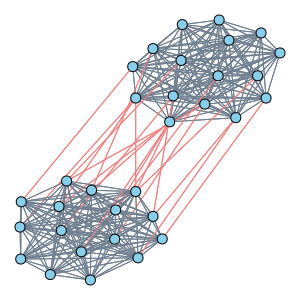

In [119]:
G, visual_style = visual_barbell(A_barbell, n1, n2)
igraph.plot(G, "barbell_graph_' + str(n1 + n2) + '_' + str(bridge) + '.pdf", **visual_style)

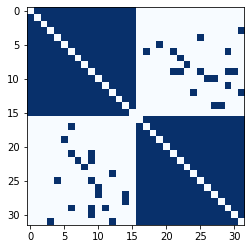

In [129]:
plt.imshow(A_barbell, cmap = 'Blues')
plt.savefig('barbell_graph_' + str(n1 + n2) + '_' + str(bridge) + '.pdf', bbox_inches = 'tight')

In [2]:
def get_adj_ER(n, edge):
    index = np.random.choice(n * n, edge, replace = False)
    i1 = np.repeat(np.arange(n), n)[index]
    i2 = np.tile(np.arange(n), n)[index]    
    A = np.zeros((n, n))
    A[i1,i2] = 1
    for i in range(n):
        A[i, i] = 0
    return A

def visual_network(adj,label = None,color = None):
    # get the row, col indices of the non-zero elements in the adjacency matrix
    conn_indices = np.where(adj)

    # get the edge weights corresponding to these indices
    weights = adj[conn_indices]

    # a sequence of (i, j) tuples, each corresponding to an edge from i -> j
    edges = list(zip(*conn_indices))

    # initialize the graph from the edge sequence
    G = igraph.Graph(edges=edges, directed=False)

    # assign node names and weights to be attributes of the vertices and edges respectively
    if label is None:
        label = np.array([0] * adj.shape[0])
    else:
        G.vs['label'] = label
    
    col_list = ['#87CEEB', 'grey','red','green','blue']
    G.vs['color'] = [col_list[i] for i in label]
    G.es['weight'] = weights
    G.es['color'] = ['#708090']
    # Assign the weights to the 'width' attribute of the edges. This
    # means that igraph.plot will set the line thicknesses according to the edge
    # weights
    G.es['width'] = weights

    # plot the graph
    visual_style = {}
    
    visual_style["vertex_size"] = 10
    
    visual_style["edge_curved"] = 0
    
    
#     visual_style["layout"] = G.layout_kamada_kawai()
    visual_style["bbox"] = (300, 300)
#     visual_style["margin"] = 10
#     visual_style["layout"] = G.layout_sphere()
#     visual_style["layout"] = G.layout_random()
#     visual_style["layout"] = G.layout_reingold_tilford()
    visual_style["layout"] = G.layout_fruchterman_reingold()
#     visual_style["layout"] = G.layout_lgl()
#     visual_style["layout"] = G.layout_drl()
#     visual_style["layout"] = G.layout_circle()
    visual_style["labels"] = True

#     f = igraph.plot(G, **visual_style)
    # igraph.plot(G, layout="rt", labels=True, margin=10)
    return G, visual_style

In [3]:
random.seed(0)
seed(0)

# parameters
n = 32
n_edges = 300
A_ER = get_adj_ER(n = n, edge = n_edges)

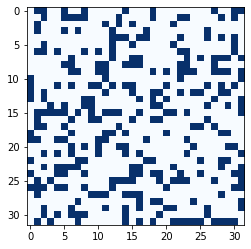

In [300]:
plt.imshow(A_ER, cmap = 'Blues')
plt.savefig('ER_' + str(n) + '_' + str(n_edges) + '.pdf', bbox_inches = 'tight')

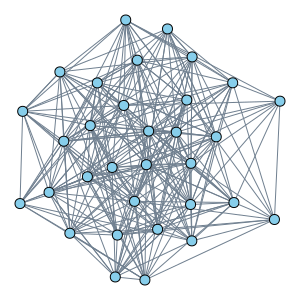

In [16]:
G, visual_style = visual_network(A_ER)
# igraph.plot(G, 'ER_' + str(n) + '_' + str(n_edges) + '.pdf', **visual_style)
igraph.plot(G, **visual_style)

In [442]:
def get_adj_star(n, hub = 0):
    A = np.zeros((n, n))
    for i in range(n):
        A[hub, i] = 1
        A[i, hub] = 1
    A[hub, hub] = 0
    return A

In [450]:
n = 32
A_star = get_adj_star(n = n, hub = 5)

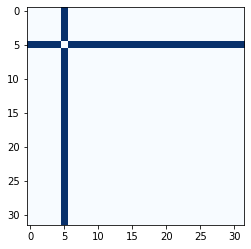

In [454]:
plt.imshow(A_star, cmap = 'Blues')
plt.savefig('star_adj_' + str(n) + '.pdf', bbox_inches = 'tight')

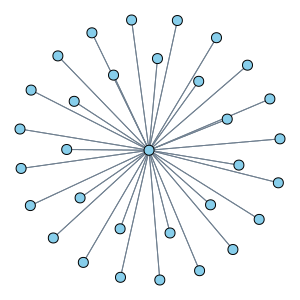

In [453]:
G, visual_style = visual_network(A_star)
igraph.plot(G, 'star_' + str(n) + '.pdf', **visual_style)
# igraph.plot(G, **visual_style)